# Exercise lecture 8 - Multilayer Perceptron
Develop an MLP for the MNIST
database by using the dimension-reduced data from your work on Exercises 2 and 3. You can download the LDA projected data here.
Further, you can use 10-, 20- and 30-dimensional data generated by PCA and compare
their performance (at the same time, try various MLP architectures).

## Loading data

In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
import time
import warnings

In [2]:
# Creating datasets
warnings.simplefilter(action='ignore') #Ignore warnings

def create_complete_datasets(data_dict):
    '''
    Function for creating complete training and test sets containing
    all classes.
    '''
    #Empty list
    trainset = []
    traintargets =[]
    testset = []
    testtargets =[]
    
    #For each class
    for i in range(10):
        trainset.append(data_dict["train%d"%i])
        traintargets.append(np.full(len(data_dict["train%d"%i]),i))
        testset.append(data_dict["test%d"%i])
        testtargets.append(np.full(len(data_dict["test%d"%i]),i))
    
    #Concatenate into to complete datasets
    trainset = np.concatenate(trainset)
    traintargets = np.concatenate(traintargets)
    testset = np.concatenate(testset)
    testtargets = np.concatenate(testtargets)
    return trainset, traintargets, testset, testtargets

file = "Data/mnist_all.mat"
data = loadmat(file)

#Complete training and test sets
train_set, train_targets, test_set, test_targets = create_complete_datasets(data)
train_set = train_set/255
test_set = test_set/255
classes = np.arange(10)

print(f"Classes: \n{classes}")
print(f"train_targets: \n{train_targets}, shape: {train_targets.shape}")
print(f"train_set: \n{train_set}, shape: {train_set.shape}")
print(f"test_targets: \n{test_targets}, shape: {test_targets.shape}")
print(f"test_set: \n{test_set}, shape: {test_set.shape}")

Classes: 
[0 1 2 3 4 5 6 7 8 9]
train_targets: 
[0 0 0 ... 9 9 9], shape: (60000,)
train_set: 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape: (60000, 784)
test_targets: 
[0 0 0 ... 9 9 9], shape: (10000,)
test_set: 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape: (10000, 784)


## Generating PCA/LDA data
From previous exercises we already know how to use PCA/LDA.
We first fit a PCA/LDA model to our training data, and then transform the training and test data using this model, to get a dimensionality reduced data set.

In [3]:
# Generating PCA/LDA reduced data
# Initialize n_components list
n_components = [10, 20, 30]

# PCA
pca = [PCA(n_components=n_component) for n_component in n_components]
pca_trains = [pca_reduce_train.fit_transform(train_set) for pca_reduce_train in pca ]
pca_tests = [pca_reduce_test.transform(test_set) for pca_reduce_test in pca]
print("PCA train reduced data:",[pca.shape for pca in pca_trains])
print("PCA test reduced data:", [pca.shape for pca in pca_tests])

# LDA
lda = LDA(n_components=None)
lda_train = lda.fit_transform(train_set,train_targets)
lda_test = lda.transform(test_set)
print("LDA train reduced data:",lda_train.shape)
print("LDA test reduced data:",lda_test.shape)

PCA train reduced data: [(60000, 10), (60000, 20), (60000, 30)]
PCA test reduced data: [(10000, 10), (10000, 20), (10000, 30)]
LDA train reduced data: (60000, 9)
LDA test reduced data: (10000, 9)


## Creating and Training MLP
Sklearn has a multilayer perceptron classifier which we can use:
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html 

To use it, we need to choose how many layers we would like to use and the size of each hidden layer. 
We can also choose which non-linear activation function to use and what optimizer/solver to use.
You can set a maximum iteration number as well (to limit compute time).

### Model trained on LDA data

In [12]:
# Instantiate MLP with your parameters of choice and train it on the LDA dimensionality reduced training data.
# Afterwards test it on the test data

# Initialize parameter dict
iter = 5
verbose = False
stop = True

# Default activation function and solver
params1 = {
    "max_iter": iter,
    "activation": 'relu',
    "solver": 'adam',
    "verbose": verbose,
    "early_stopping": stop
}

params3 = {
    "hidden_layer_sizes": (100,),
    "max_iter": iter,
    "activation": 'tanh',
    "solver": 'sgd',
    "verbose": verbose,
    "early_stopping": stop
}

params2 = {
    "hidden_layer_sizes": (100,),
    "max_iter": iter,
    "activation": 'logistic',
    "solver": 'sgd',
    "verbose": verbose,
    "early_stopping": stop
}


params = [params1, params2, params3]

# Initialize MLPClassifier object and different architectures
archs = [(100,50),(100,100,50),(200,100,50)]
mlp_clfs = [MLPClassifier(hidden_layer_sizes=arch,**params1) for arch in archs]
for mlp_clf in mlp_clfs:
    print(mlp_clf)


MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 50), max_iter=5)
MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 100, 50),
              max_iter=5)
MLPClassifier(early_stopping=True, hidden_layer_sizes=(200, 100, 50),
              max_iter=5)


### Model trained on PCA data

In [15]:
# Instantiate MLP with your parameters of choice and train it on the PCA dimensionality reduced training data.
# Afterwards test it on the test data

# Train MLPC on pca reduced data
mlp_pcas = []
for mlp_clf in mlp_clfs:
    for pca_train, n in zip(pca_trains, n_components):
        print(f"\nClassifier: {mlp_clf}")
        print(f"--- Training on: {n} Dimensions ---")
        timeStart = time.time()
        mlp_pcas.append(mlp_clf.fit(pca_train, train_targets))
        timeEnd = time.time()
        elapsed_time = timeEnd - timeStart
        
        # Convert elapsed time to minutes or seconds
        if elapsed_time < 60:
            time_unit = "seconds"
            time_value = elapsed_time
        else:
            time_unit = "minutes"
            time_value = elapsed_time / 60
        print(f"Training took: {time_value} {time_unit}")
print("\n-------------------------\n--- Finished training ---\n-------------------------")


Classifier: MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 50), max_iter=5)
--- Training on: 10 Dimensions ---
Training took: 1.8684327602386475 seconds

Classifier: MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 50), max_iter=5)
--- Training on: 20 Dimensions ---
Training took: 1.7885770797729492 seconds

Classifier: MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 50), max_iter=5)
--- Training on: 30 Dimensions ---
Training took: 1.77915358543396 seconds

Classifier: MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 100, 50),
              max_iter=5)
--- Training on: 10 Dimensions ---
Training took: 2.831169366836548 seconds

Classifier: MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 100, 50),
              max_iter=5)
--- Training on: 20 Dimensions ---
Training took: 2.991873264312744 seconds

Classifier: MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 100, 50),
              max_iter=5)
--- Training on: 30 Di

In [16]:
mlp_pcas = [[mlp_pcas[0], mlp_pcas[1], mlp_pcas[2]],
            [mlp_pcas[3], mlp_pcas[4], mlp_pcas[5]],
            [mlp_pcas[6], mlp_pcas[7], mlp_pcas[8]]]
for mlp_pca in mlp_pcas:
    print(mlp_pca)

[MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 50), max_iter=5), MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 50), max_iter=5), MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 50), max_iter=5)]
[MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 100, 50),
              max_iter=5), MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 100, 50),
              max_iter=5), MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 100, 50),
              max_iter=5)]
[MLPClassifier(early_stopping=True, hidden_layer_sizes=(200, 100, 50),
              max_iter=5), MLPClassifier(early_stopping=True, hidden_layer_sizes=(200, 100, 50),
              max_iter=5), MLPClassifier(early_stopping=True, hidden_layer_sizes=(200, 100, 50),
              max_iter=5)]


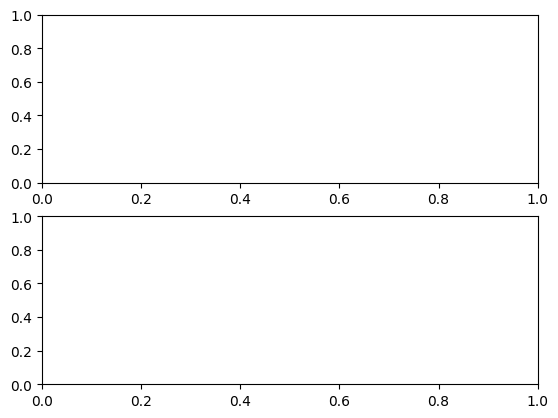

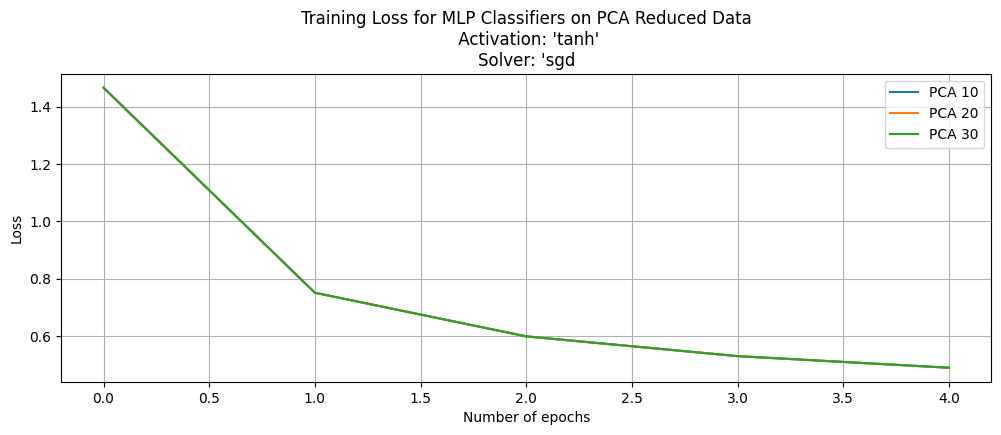

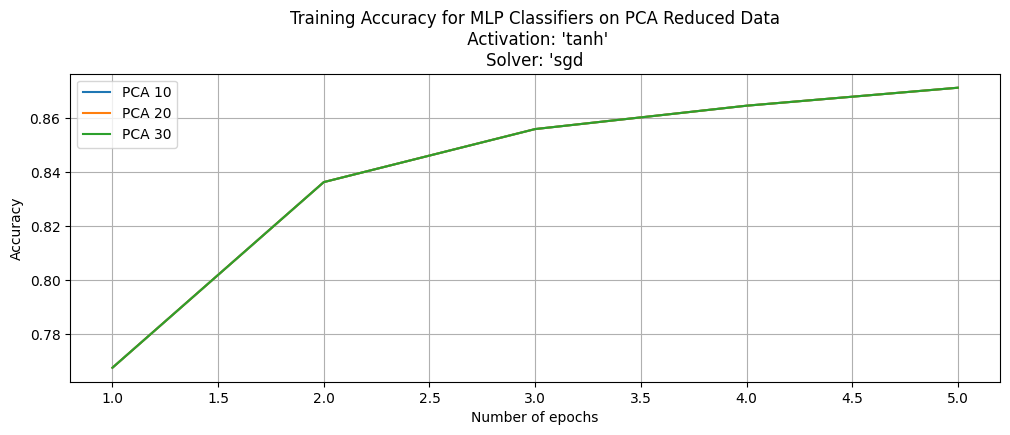

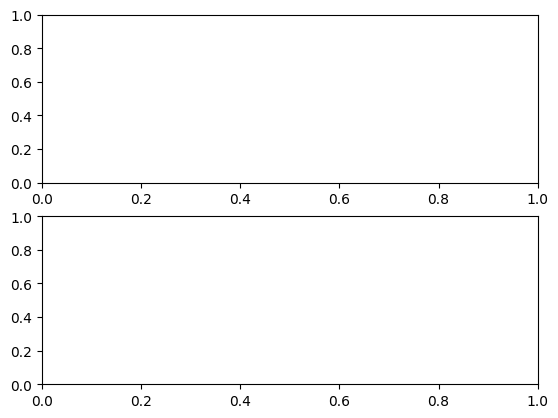

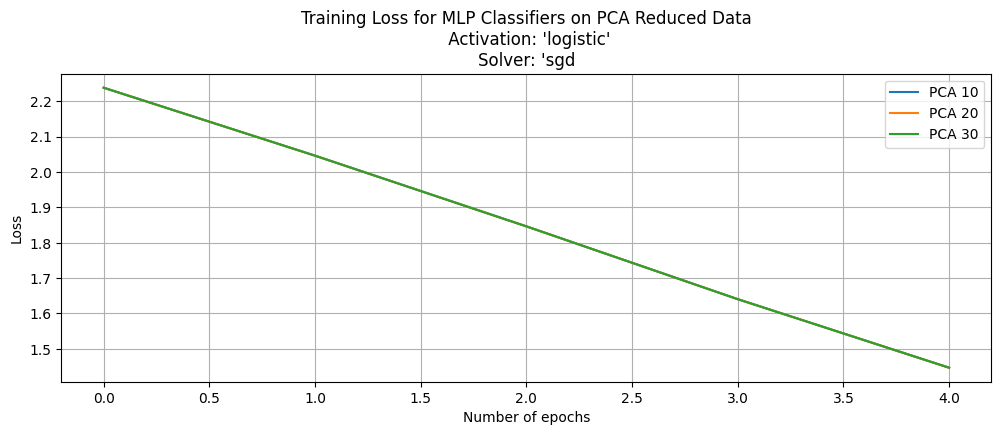

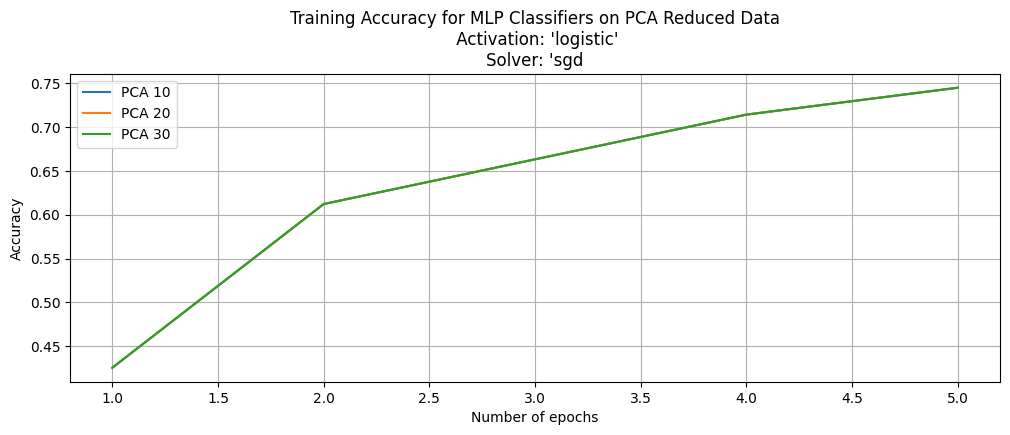

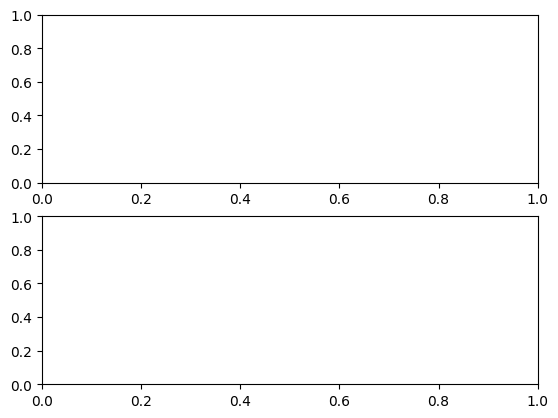

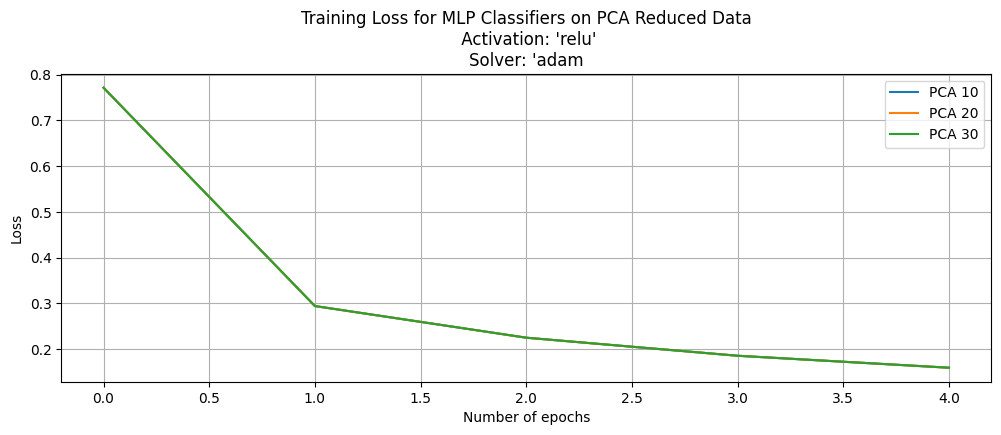

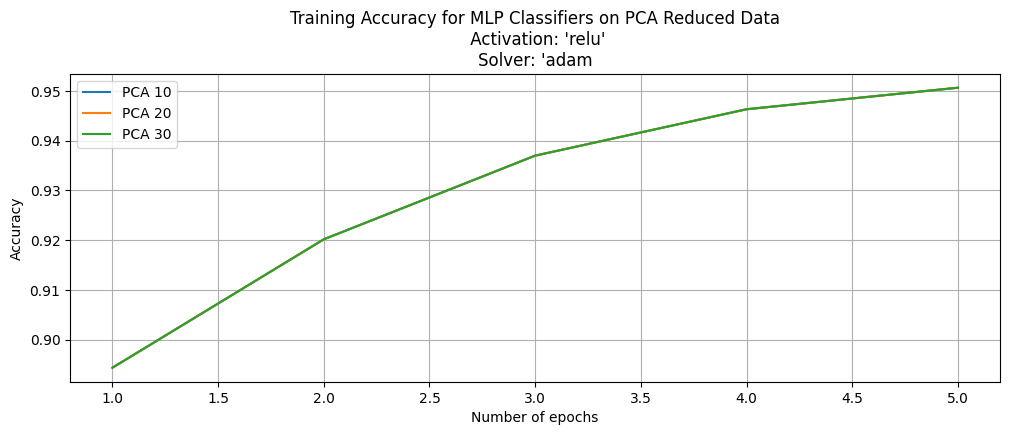

In [11]:
# Define labels for classifiers
labels = ["Activation: 'tanh'\nSolver: 'sgd", 
          "Activation: 'logistic'\nSolver: 'sgd",
          "Activation: 'relu'\nSolver: 'adam"]

# Plot loss/accuracy during training
for mlp_pca, label in zip(mlp_pcas, labels):
    mlp_pca_acc1 = mlp_pca[0].validation_scores_
    mlp_pca_acc2 = mlp_pca[1].validation_scores_
    mlp_pca_acc3 = mlp_pca[2].validation_scores_
    fig, ax = plt.subplots(2)
    plt.figure(figsize=(12,4))
    plt.title(f"Training Loss for MLP Classifiers on PCA Reduced Data\n {label}")
    plt.plot(mlp_pca[0].loss_curve_, label="PCA 10")
    plt.plot(mlp_pca[1].loss_curve_, label="PCA 20")
    plt.plot(mlp_pca[2].loss_curve_, label="PCA 30")
    plt.xlabel("Number of epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    
    plt.figure(figsize=(12,4))
    plt.title(f"Training Accuracy for MLP Classifiers on PCA Reduced Data\n {label}")
    plt.plot(range(1, len(mlp_pca_acc1)+1),mlp_pca_acc1, label="PCA 10")
    plt.plot(range(1, len(mlp_pca_acc2)+1),mlp_pca_acc2, label="PCA 20")
    plt.plot(range(1, len(mlp_pca_acc3)+1),mlp_pca_acc3, label="PCA 30")
    plt.xlabel("Number of epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid()
    
    
    plt.show()


In [ ]:
confusion_matrices = []
accuracies = []
for mlp_pca, pca_test in zip(mlp_pcas, pca_tests):
    # Predict probabilities
    mlp_pca_prob = mlp_pca.predict(pca_test)
    print(mlp_pca_prob)
    
    # Compute accuracy by CM
    mlp_pca_cm = confusion_matrix(test_targets, mlp_pca_prob)
    print(mlp_pca_cm)
    
    # Plot CM
    ConfusionMatrixDisplay(confusion_matrix=mlp_pca_cm, display_labels=mlp_pca.classes_).plot()
    plt.title(f"CM of PCA reduced data using MLP: {pca_test}")
    plt.show()

## Comparing the trained models
With models trained on both LDA and PCA data, let's compare them using the confusion matrices.

In [ ]:
#%%Confusion matrix
#Compute the confusion matrices for both MLPs (trained on PCA and LDA) and plot

### What can we conclude from the comparison?
